In [1]:
from backbone_cnn import BackboneNet
import torch.nn.functional as F
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n_epochs = 10
batch_size_train = 100
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = True
torch.device('cuda')
torch.manual_seed(random_seed)

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=False)

In [4]:
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

In [5]:
net = BackboneNet()
net.cuda()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [6]:
running_loss = 0.0
for epoch in range(n_epochs):
    
    for idx, (data, target) in tqdm(enumerate(train_loader)):
        target = target.to('cuda:0')
        data = data.to('cuda:0')
        optimizer.zero_grad()
        output = net(data)
        loss =  F.nll_loss(output, target) 
        loss.backward()
        optimizer.step()
    print(f"epoch: {epoch} loss: {loss.item()}")

0it [00:00, ?it/s]/home/ali/ml/handwriting_data_generator/model/backbone_cnn.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
600it [00:10, 57.16it/s]
6it [00:00, 57.12it/s]

epoch: 0 loss: 0.10959195345640182


600it [00:09, 66.05it/s]
7it [00:00, 63.37it/s]

epoch: 1 loss: 0.055509522557258606


600it [00:10, 58.38it/s]
6it [00:00, 56.50it/s]

epoch: 2 loss: 0.003278956515714526


600it [00:09, 58.92it/s]
6it [00:00, 59.88it/s]

epoch: 3 loss: 0.021406210958957672


600it [00:09, 65.78it/s]
7it [00:00, 62.48it/s]

epoch: 4 loss: 0.016488047316670418


600it [00:10, 59.68it/s]
6it [00:00, 55.45it/s]

epoch: 5 loss: 0.0012833785731345415


600it [00:10, 61.11it/s]
6it [00:00, 55.05it/s]

epoch: 6 loss: 0.020111609250307083


600it [00:10, 59.36it/s]
7it [00:00, 62.30it/s]

epoch: 7 loss: 0.009711517952382565


600it [00:10, 55.62it/s]
6it [00:00, 56.56it/s]

epoch: 8 loss: 0.004771232604980469


600it [00:10, 56.11it/s]

epoch: 9 loss: 0.0013767242198809981


In [7]:
loss.item()

0.0013767242198809981

In [8]:
torch.cuda.is_available()

True

In [9]:
net.eval()

BackboneNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [10]:
def test(mynet):
    for data,target in test_loader:
        data = data.to('cuda:0')
        target = target.to('cuda:0')
        x=mynet(data).data.argmax(1).eq(target).sum()
        print(x.item()/len(target))
test(net)

0.991
0.988
0.978
0.987
0.991
0.996
0.995
1.0
0.998
0.991


In [11]:
torch.save(net.state_dict(), 'backbone_net')

In [14]:
new_net = BackboneNet()
new_net.cuda()

BackboneNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [15]:
test(new_net)

0.089
0.097
0.088
0.092
0.074
0.086
0.097
0.083
0.095
0.088


In [16]:
new_net.load_state_dict(torch.load('backbone_net'))

<All keys matched successfully>

In [17]:
test(new_net)

0.991
0.988
0.978
0.987
0.991
0.996
0.995
1.0
0.998
0.991


In [18]:
net.eval()

BackboneNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [19]:
net.conv1

Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))

In [20]:
backbone = torchvision.models.mobilenet_v2(pretrained=True).features

In [21]:
backbone

Sequential(
  (0): ConvBNReLU(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (1): InvertedResidual(
    (conv): Sequential(
      (0): ConvBNReLU(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): InvertedResidual(
    (conv): Sequential(
      (0): ConvBNReLU(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      

In [23]:
backbone = nn.Sequential(net.conv1, net.pool, net.conv2, net.conv2_drop, net.pool)

In [24]:
backbone

Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (3): Dropout2d(p=0.5, inplace=False)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [25]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

In [26]:
anchor_generator = AnchorGenerator(sizes=((5, 10, 20, 50),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))

In [27]:
backbone.out_channels = 64

In [28]:
backbone(data)

tensor([[[[ 7.4644e-01,  1.7188e+00,  1.4526e+00,  ...,  1.4700e+00,
            4.0721e+00,  1.8094e+00],
          [ 7.6510e-01,  1.5074e+00,  1.8750e+00,  ..., -7.0608e+00,
            1.9860e+00,  1.4626e+00],
          [ 7.6510e-01,  1.6514e+00,  5.4253e+00,  ..., -9.7108e+00,
            1.6626e+00,  9.1714e-01],
          ...,
          [ 7.6510e-01,  1.8049e+00,  5.8131e-01,  ..., -7.6878e-01,
            1.5981e+00,  1.4038e+00],
          [ 7.6510e-01,  3.7615e+00, -1.1383e+01,  ...,  8.8997e-01,
            2.0158e+00,  1.0495e+00],
          [ 1.5934e+00,  5.0048e+00,  5.1727e+00,  ...,  2.2145e+00,
            2.1670e+00,  1.5093e+00]],

         [[-1.4061e-01, -2.2798e+00, -2.0776e+00,  ..., -1.9035e+00,
            3.3380e+00, -1.2636e+00],
          [ 5.1966e-01, -1.1106e+00, -1.8510e-01,  ...,  1.6633e+01,
            1.4323e+01, -6.0197e-01],
          [ 5.1966e-01, -1.0428e+00,  7.5726e+00,  ...,  1.9028e+01,
            1.0614e+01, -9.1234e-01],
          ...,
     

In [126]:
"""Creating a data loading class."""

import re
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils
from torch.utils.data import DataLoader, Dataset

class GeneratedData(Dataset):
    """Loading the images and bounding boxes."""
    
    def __init__(self, transform=None):
        """
        @param callable transform
        """
        
        self.data = pd.read_csv('../data/image_data.csv')
        self.transform = transform
        self.parser = re.compile("\(.*?\)")
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = self.data.iloc[idx]['filename']
        
        image = io.imread(f"../data/{img_name}")
        boxes = self.data.iloc[idx]['boxes']
        boxes = np.array([[int(j) for j in i.strip(')()').split(',')] for i in self.parser.findall(boxes)])
        
        labels = self.data.iloc[idx]['labels']
        labels = np.array([int(i) for i in labels if i.isdigit()])
        
        sample = {'image': image,
                  'labels': labels,
                  'boxes': boxes}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample


In [127]:
data = GeneratedData()

In [128]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

0 (40, 200) (5, 4) [7 2 0 1 9]
1 (40, 200) (4, 4) [0 5 7 9]
2 (40, 200) (4, 4) [7 3 7 9]
3 (40, 200) (1, 4) [3]


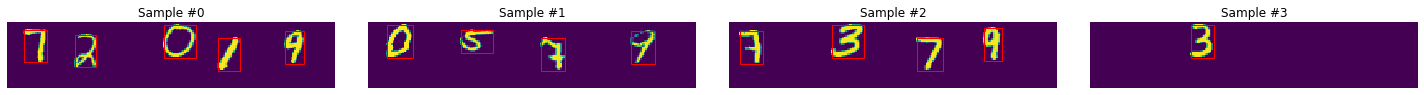

In [130]:
fig = plt.figure(figsize=(20,20))
n = 3
for i in range(len(data)):
    sample = data[i]

    print(i, sample['image'].shape, sample['boxes'].shape, sample['labels'])

    ax = plt.subplot(1, n+1, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    ax.imshow(sample['image'])
    for box in sample['boxes']:
        box = Rectangle(xy=(box[0],box[1]), width= box[3], height=box[2], facecolor='none', edgecolor='r')
        ax.add_patch(box)
    if i == n:
        plt.show()
        break